In [1]:
#Import required packages in order to solve this numerical problem

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

In [2]:
#Introduce the ODE

def dy_dt(y,t,omega,fcf):
    y1,y2,y3,y4=y
    eps=1e-12
    if abs(y1)<eps:
        y1=eps
    dydt=[y2,2.*omega*y1*y4+y1*(fcf*omega**2+y4**2),\
         y4,-(2.*y2/y1)*(omega+y4)]
    return dydt

In [3]:
#Set up initial conditions for problem

T=2000 #Period in seconds
omega=(2*np.pi)/T #Angular velocity in radians per second
R=1000000 #Radius in meters
v=omega*R #Velocity in meters per second
y0=[R,-v,0.,0.]
fcf=1. #Centrifugal force

In [4]:
#Set up time limits for integration

t_i=0.
t_f=1000.
nt=10000 #Number of times in integration
t=np.linspace(t_i,t_f,nt)

In [5]:
#Solve the ODE
solution=odeint(dy_dt,y0,t,args=(omega,fcf))

In [7]:
h=R-solution[:,0] #Because h=R-r'
phi=solution[:,2]*(180/np.pi) #In degrees

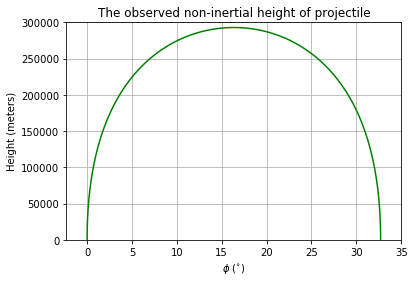

In [8]:
#Plot trajectory

plt.plot(phi,h,'g')
plt.axis([-2.3,35,0,300000])
plt.title("The observed non-inertial height of projectile")
plt.ylabel("Height (meters)")
plt.xlabel("$\phi$ ($^{\circ}$)")
plt.grid()
plt.show()

In [10]:
print("The landing angle of projectile relative to launch point:",format(max(phi),".2f"),"deg")
print("The max height projectile experiences:",format(max(h),".2f"),"m")

The landing angle of projectile relative to launch point: 32.70 deg
The max height projectile experiences: 292893.20 m


In [13]:
phi_1=np.arctan(omega*t/(1-omega*t))-omega*t #Non-intertial frame
r_1=R*(1-2*omega*t*(1-omega*t))**(1/2) #r' in non-intertial frame

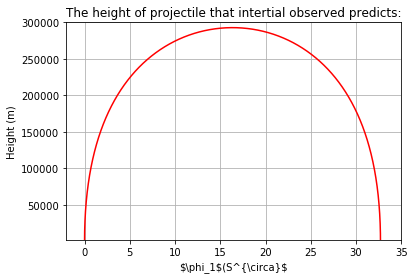

In [14]:
#Plot

plt.plot(phi_1*(180/np.pi),R-r_1,'r')
plt.axis([-2,35,2000,300000])
plt.title("The height of projectile that intertial observed predicts:")
plt.ylabel("Height (m)")
plt.xlabel("$\phi_1$(S^{\circa}$")
plt.grid()
plt.show()